In [261]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [262]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

In [263]:

# %timeit sirve para evaluar el tiempo de ejecucion
train_entrenamiento = pd.read_csv('train_paso_3.csv')
test_entrenamiento = pd.read_csv('test_paso_3.csv')
test = pd.read_csv('trocafone_kaggle_test.csv')

 

In [264]:
len(train_entrenamiento)
train_entrenamiento = train_entrenamiento.drop('person', 1)

In [265]:
train_entrenamiento.head()

,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,...,Sony,iPad,iPhone,Direct,Email,Organic,Paid,Referral,Social,desconocido_channel
0,0.00,0.00,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
1,1.00,0.00,1.00,0.00,1.00,0.00,1.00,9.00,0.00,3.00,...,0.00,0.00,4.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,5.00,0.00,1.00,0.00,4.00,0.00,0.00,4.00,0.00,4.00,...,0.00,0.00,5.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,29.00,165.00,15.00,2.00,28.00,0.00,13.00,11.00,0.00,189.00,...,0.00,0.00,3.00,0.00,0.00,2.00,16.00,1.00,0.00,0.00
4,0.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [266]:
test_entrenamiento = test_entrenamiento.drop('person', 1)


In [267]:
test_entrenamiento.head()

,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,...,Sony,iPad,iPhone,Direct,Email,Organic,Paid,Referral,Social,desconocido_channel
0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,4.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,29.00,4.00,7.00,0.00,21.00,1.00,0.00,6.00,0.00,404.00,...,0.00,5.00,405.00,56.00,0.00,1.00,21.00,17.00,0.00,0.00
2,1.00,5.00,1.00,0.00,1.00,0.00,2.00,1.00,0.00,13.00,...,0.00,0.00,6.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
3,15.00,7.00,1.00,0.00,20.00,0.00,26.00,1.00,5.00,739.00,...,22.00,0.00,8.00,1.00,0.00,14.00,6.00,1.00,0.00,0.00
4,14.00,8.00,2.00,0.00,14.00,0.00,13.00,9.00,0.00,177.00,...,0.00,0.00,176.00,2.00,0.00,3.00,6.00,9.00,0.00,0.00


In [268]:
len(test_entrenamiento)

19415

In [269]:
#feature engieri del train,misma columna train,pero sin label.

In [270]:
string_columns=train_entrenamiento.columns
string_columns

Index(['ad campaign hit', 'brand listing', 'checkout', 'conversion',
       'generic listing', 'lead', 'search engine hit', 'searched products',
       'staticpage', 'viewed product', 'visited site', 'mean_per_event',
       'most_frequent_event', 'count_most_frequent_event',
       'less_frequent_event', 'count_less_frequent_event', 'label', '128GB',
       '16GB', '256GB', '32GB', '4GB', '512MB', '64GB', '8GB', 'Bom',
       'Bom - Sem Touch ID', 'Excelente', 'Muito Bom', 'Novo',
       'desconocido_modelo', 'Asus', 'LG', 'Lenovo', 'Motorola', 'Quantum',
       'Samsung', 'Sony', 'iPad', 'iPhone', 'Direct', 'Email', 'Organic',
       'Paid', 'Referral', 'Social', 'desconocido_channel'],
      dtype='object')

In [271]:
#hash
#Transformo texto a numeros
for f in string_columns:
         train_entrenamiento[f] = train_entrenamiento.apply(lambda row:  hash(row[f]) if not(pd.isnull(row[f]))
         else np.nan, axis = 1)

In [272]:
train_entrenamiento.head(5)

,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,...,Sony,iPad,iPhone,Direct,Email,Organic,Paid,Referral,Social,desconocido_channel
0,0,0,3,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0
1,1,0,1,0,1,0,1,9,0,3,...,0,0,4,0,0,0,1,0,0,0
2,5,0,1,0,4,0,0,4,0,4,...,0,0,5,0,0,0,1,0,0,0
3,29,165,15,2,28,0,13,11,0,189,...,0,0,3,0,0,2,16,1,0,0
4,0,1,2,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [273]:
train_label = train_entrenamiento['label']
train_label.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [274]:
train = train_entrenamiento.drop('label', 1)
train.head()

,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,...,Sony,iPad,iPhone,Direct,Email,Organic,Paid,Referral,Social,desconocido_channel
0,0,0,3,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0
1,1,0,1,0,1,0,1,9,0,3,...,0,0,4,0,0,0,1,0,0,0
2,5,0,1,0,4,0,0,4,0,4,...,0,0,5,0,0,0,1,0,0,0
3,29,165,15,2,28,0,13,11,0,189,...,0,0,3,0,0,2,16,1,0,0
4,0,1,2,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [275]:
## version mejor
#n_estimr=100 , max_depth= 400  , min sample=6
#ahora con 3000 y 6000 dio mejor ramdomstate=5
forest = RandomForestRegressor(n_estimators = 3000, n_jobs = -1,random_state =5 ,
                                max_features = "auto",max_depth=6000, min_samples_leaf = 7)


In [276]:
forest.fit(train, train_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6000,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

Feature ranking:
1. feature 2 (0.148071)
2. feature 11 (0.053334)
3. feature 29 (0.050654)
4. feature 35 (0.047730)
5. feature 1 (0.038696)
6. feature 24 (0.037286)
7. feature 17 (0.037068)
8. feature 19 (0.034397)
9. feature 13 (0.032825)
10. feature 27 (0.031850)
11. feature 38 (0.031673)
12. feature 9 (0.031536)
13. feature 23 (0.029641)
14. feature 26 (0.028385)
15. feature 4 (0.027207)
16. feature 0 (0.026064)
17. feature 22 (0.024431)
18. feature 6 (0.023929)
19. feature 7 (0.023336)
20. feature 33 (0.023242)
21. feature 3 (0.023103)
22. feature 10 (0.022478)
23. feature 14 (0.020919)
24. feature 16 (0.017192)
25. feature 39 (0.016731)
26. feature 42 (0.015962)
27. feature 43 (0.014499)
28. feature 41 (0.013106)
29. feature 25 (0.011564)
30. feature 15 (0.009543)
31. feature 12 (0.009523)
32. feature 31 (0.007742)
33. feature 36 (0.006365)
34. feature 8 (0.005770)
35. feature 18 (0.004765)
36. feature 30 (0.004073)
37. feature 32 (0.003792)
38. feature 44 (0.002521)
39. feature 2

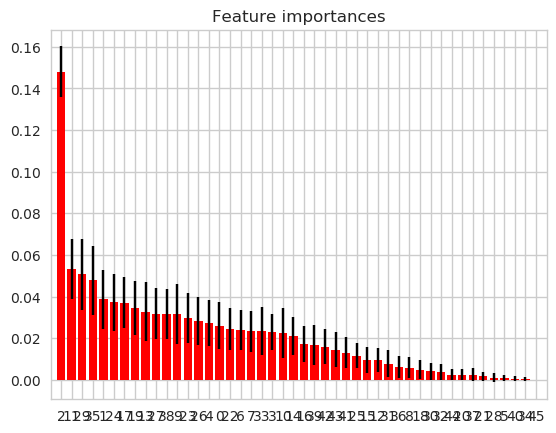

In [277]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train.shape[1]), indices)
plt.xlim([-1, train.shape[1]])
plt.show()

In [278]:
string_columns=test_entrenamiento.columns
string_columns

Index(['ad campaign hit', 'brand listing', 'checkout', 'conversion',
       'generic listing', 'lead', 'search engine hit', 'searched products',
       'staticpage', 'viewed product', 'visited site', 'mean_per_event',
       'most_frequent_event', 'count_most_frequent_event',
       'less_frequent_event', 'count_less_frequent_event', '128GB', '16GB',
       '256GB', '32GB', '4GB', '512MB', '64GB', '8GB', 'Bom',
       'Bom - Sem Touch ID', 'Excelente', 'Muito Bom', 'Novo',
       'desconocido_modelo', 'Asus', 'LG', 'Lenovo', 'Motorola', 'Quantum',
       'Samsung', 'Sony', 'iPad', 'iPhone', 'Direct', 'Email', 'Organic',
       'Paid', 'Referral', 'Social', 'desconocido_channel'],
      dtype='object')

In [279]:
#hash del test
#hash
#Transformo texto a numeros
for f in string_columns:
         test_entrenamiento[f] = test_entrenamiento.apply(lambda row:  hash(row[f]) if not(pd.isnull(row[f]))
         else np.nan, axis = 1)

In [280]:
test_entrenamiento.head()

,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,...,Sony,iPad,iPhone,Direct,Email,Organic,Paid,Referral,Social,desconocido_channel
0,0,0,1,0,1,0,1,1,0,4,...,0,0,0,0,0,1,0,0,0,0
1,29,4,7,0,21,1,0,6,0,404,...,0,5,405,56,0,1,21,17,0,0
2,1,5,1,0,1,0,2,1,0,13,...,0,0,6,0,0,1,1,0,0,0
3,15,7,1,0,20,0,26,1,5,739,...,22,0,8,1,0,14,6,1,0,0
4,14,8,2,0,14,0,13,9,0,177,...,0,0,176,2,0,3,6,9,0,0


In [281]:
#predecimos
prediction = forest.predict(test_entrenamiento)

In [282]:
ids = test['person'].values
dataKaggle = pd.DataFrame(ids ,columns={'person'})
dataKaggle.head(5)

,person
0,4886f805
1,0297fc1e
2,2d681dd8
3,cccea85e
4,4c8a8b93


In [283]:
len(prediction)

19415

In [284]:
#Aca agregamos una columna que seria se postulop
dataKaggle['label'] = prediction

In [285]:
 dataKaggle.nlargest(5,'label'  )

,person,label
262,2b213b2c,0.66
16466,c7ad7cf9,0.64
14369,36fa57dd,0.61
724,6b1f5017,0.59
17648,71111a7b,0.59


In [286]:
dataKaggle.to_csv("predictionRandonForest4.csv", index = False)